In [1]:
using Revise    
include("../../src/pure/Pnjl_pure.jl")
using Plots
using DataFrames, CSV
using Peaks
using BenchmarkTools

In [2]:
using Revise
include("../../src/pure/Rep.jl")

using Plots, LaTeXStrings

In [5]:

ints = get_nodes_hard(128, 256;IR=50.0)
X0 = [-0.01, -0.01, -0.2, 0.8, 0.8]  # phi_u, phi_d, phi_s, Phi1, Phi2
Ts = 300.0:-2.00:100
mu_B = 850.0
Ss = zeros(length(Ts))
etas = zeros(length(Ts))
sigmas = zeros(length(Ts))
for (j, T) in enumerate(Ts)
    #println("T = $T MeV")
    X0 = Tmu(T/hc, mu_B/hc, X0, ints)
    etas[j] = trans_eff(X0, T/hc, mu_B/hc, ints)[3]
    sigmas[j] = trans_eff(X0, T/hc, mu_B/hc, ints)[4]
    Ss[j] = DTOmega(1.001 * X0, T/hc, mu_B/hc, ints)
end
eta_s = etas ./ Ss
println("Done.")
df = DataFrame(T=Ts, eta_s=eta_s, sigma_el=sigmas)
CSV.write("eta_s_PNJLs_mu=$mu_B.csv", df)

Done.


"eta_s_PNJLs_mu=850.0.csv"

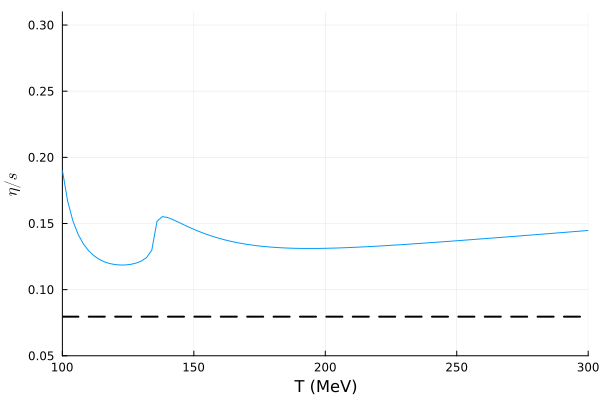

In [7]:
p = plot(
    Ts, etas ./ Ss;
    xlim=(100.0, 300.0),
    ylim=(0.05, 0.31),
    xlabel="T (MeV)",
    ylabel=L"\eta/s",
    legend=false,
    size=(600, 400),
    grid=true,

)

hline!(
    p, [1 / (4 * π)];
    linestyle=:dash,
    linewidth=2,
    color=:black,
)